In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/cereal.csv', index_col='name')

In [3]:
df.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [18]:
df.replace({'mfr':{'K':'Kelloggs',
                              'N':'Nabisco',
                              'Q':'Quaker',
                              'A':'Homestat Farm',
                                'P':'Post',
                               'G':'General mills',
                               'R':'Ralston Purina'
                            }}, inplace=True)

In [47]:
df[df['mfr']=='Ralston Purina']

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
Almond Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
Bran Chex,Ralston Purina,C,90,2,1,200,4.0,15.0,6,125,25,1,1.0,0.67,49.120253
Corn Chex,Ralston Purina,C,110,2,0,280,0.0,22.0,3,25,25,1,1.0,1.00,41.445019
Double Chex,Ralston Purina,C,100,2,0,190,1.0,18.0,5,80,25,3,1.0,0.75,44.330856
Muesli Raisins; Dates; & Almonds,Ralston Purina,C,150,4,3,95,3.0,16.0,11,170,25,3,1.0,1.00,37.136863
Muesli Raisins; Peaches; & Pecans,Ralston Purina,C,150,4,3,150,3.0,16.0,11,170,25,3,1.0,1.00,34.139765
Rice Chex,Ralston Purina,C,110,1,0,240,0.0,23.0,2,30,25,1,1.0,1.13,41.998933
Wheat Chex,Ralston Purina,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445


In [37]:
pivot_by_mfr= df.pivot_table(index='mfr', values=['calories','protein','fat','carbo'] )

In [38]:
pivot_by_mfr.columns

Index(['calories', 'carbo', 'fat', 'protein'], dtype='object')

No handles with labels found to put in legend.


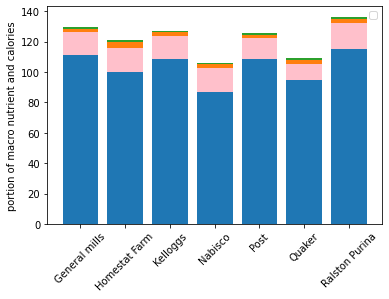

In [42]:
fig, ax = plt.subplots()
ax.bar(pivot_by_mfr.index, pivot_by_mfr['calories'])
ax.bar(pivot_by_mfr.index, pivot_by_mfr['carbo'], bottom=pivot_by_mfr['calories'], color='pink')
ax.bar(pivot_by_mfr.index, pivot_by_mfr['protein'], bottom=pivot_by_mfr['calories'] + pivot_by_mfr['carbo'])
ax.bar(pivot_by_mfr.index, pivot_by_mfr['fat'], bottom=pivot_by_mfr['calories'] + pivot_by_mfr['carbo'] + pivot_by_mfr['protein'] )

ax.set_xticklabels(pivot_by_mfr.index, rotation=45)
ax.set_ylabel('portion of macro nutrient and calories')
plt.legend()
plt.show()

In [53]:
df_mfr_count = pd.DataFrame(df['mfr'].value_counts())
df_mfr_count

,mfr
Kelloggs,23
General mills,22
Post,9
Quaker,8
Ralston Purina,8
Nabisco,6
Homestat Farm,1


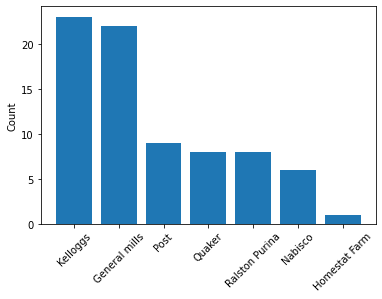

In [56]:
fig, ax = plt.subplots()

ax.bar(df_mfr_count.index, df_mfr_count['mfr'], )
ax.set_xticklabels(df_mfr_count.index, rotation=45)
ax.set_ytick
ax.set_ylabel('Count')
plt.show()


In [19]:
df_mfr_by_rating = df.loc[:,['mfr','rating']]
df_mfr_by_rating.head()

,mfr,rating
name,,
100% Bran,Nabisco,68.402973
100% Natural Bran,Quaker,33.983679
All-Bran,Kelloggs,59.425505
All-Bran with Extra Fiber,Kelloggs,93.704912
Almond Delight,Ralston Purina,34.384843


In [30]:
df_counts_by_mfr= df_mfr_by_rating['mfr'].value_counts()

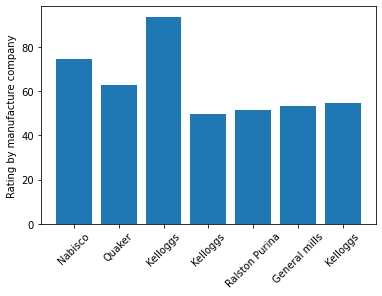

In [28]:
fig, ax = plt.subplots()
ax.bar(df_mfr_by_rating.mfr, df_mfr_by_rating['rating'])

ax.set_xticklabels(df_mfr_by_rating.mfr, rotation=45)
ax.set_ylabel('Rating by manufacture company')
plt.show()

In [32]:
df.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
100% Natural Bran,Quaker,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
Almond Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [58]:
df_kelloggs= df[df['mfr']=='Kelloggs']
df_kelloggs.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
Apple Jacks,Kelloggs,C,110,2,0,125,1.0,11.0,14,30,25,2,1.0,1.00,33.174094
Corn Flakes,Kelloggs,C,100,2,0,290,1.0,21.0,2,35,25,1,1.0,1.00,45.863324
Corn Pops,Kelloggs,C,110,1,0,90,1.0,13.0,12,20,25,2,1.0,1.00,35.782791


In [67]:
df_kelloggs['carbo'].describe()

count    23.000000
mean     15.130435
std       4.465060
min       7.000000
25%      12.000000
50%      15.000000
75%      19.000000
max      22.000000
Name: carbo, dtype: float64

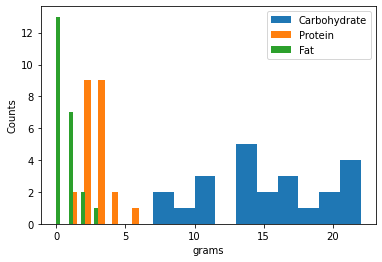

In [74]:
fig, ax = plt.subplots()
ax.hist(df_kelloggs['carbo'], label='Carbohydrate', bins=10)
ax.hist(df_kelloggs['protein'], label='Protein', bins=10)
ax.hist(df_kelloggs['fat'], label='Fat',bins=10)

ax.set_ylabel('Counts')
ax.set_xlabel('grams')
ax.legend()
plt.show()

In [75]:
df_kelloggs.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
Apple Jacks,Kelloggs,C,110,2,0,125,1.0,11.0,14,30,25,2,1.0,1.00,33.174094
Corn Flakes,Kelloggs,C,100,2,0,290,1.0,21.0,2,35,25,1,1.0,1.00,45.863324
Corn Pops,Kelloggs,C,110,1,0,90,1.0,13.0,12,20,25,2,1.0,1.00,35.782791


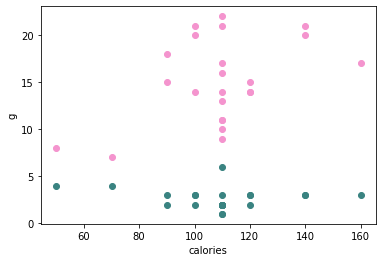

In [78]:
fig, ax= plt.subplots()
ax.scatter(df_kelloggs['calories'],df_kelloggs['carbo'], color='#f494ce')
ax.scatter(df_kelloggs['calories'],df_kelloggs['protein'], color='#3a8381')


ax.set_xlabel('calories')
ax.set_ylabel('g')

plt.show()

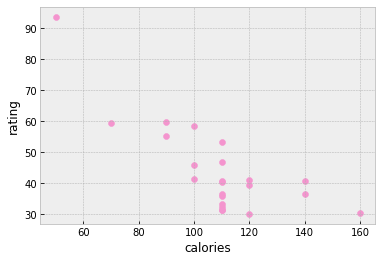

In [85]:
plt.style.use('bmh')
fig, ax= plt.subplots()
ax.scatter(df_kelloggs['calories'],df_kelloggs['rating'], c='#f494ce')

ax.set_xlabel('calories')
ax.set_ylabel('rating')

fig.savefig('cereal_cal_vs_rating.png')
plt.show()

In [86]:
ls

Data visualization lecture note/
Dec_1.ipynb
Dec_2.ipynb
Dec_3.ipynb
Dec_6.ipynb
Nov_28.ipynb
Nov_29.ipynb
Nov_30.ipynb
Numpy practice.ipynb
The Android App Market on Google Play/
The GitHub History of the Scala Language/
cereal_cal_vs_rating.png
data/
revenue.png


In [88]:
import matplotlib.cbook as cbook

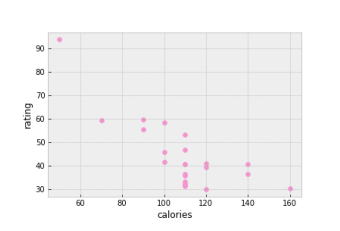

In [94]:
image= plt.imread('cereal_cal_vs_rating.png')
fig, ax = plt.subplots()
ax.imshow(image)
ax.axis('off')  # clear x- and y-axes
plt.show()

No handles with labels found to put in legend.


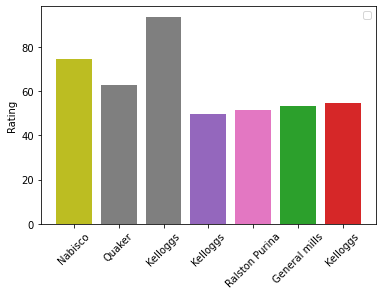

In [79]:
fig, ax = plt.subplots()

for mfr in df_mfr:
    mfr_rating = df[df["mfr"] == mfr]
    ax.bar(mfr,mfr_rating['rating'])

ax.set_ylabel("Rating")
ax.set_xticklabels(df_mfr, rotation=45)
ax.legend()
plt.show()


In [102]:
df_kelloggs.drop(columns='type', inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [107]:
df_kelloggs

,mfr,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,
All-Bran,Kelloggs,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
All-Bran with Extra Fiber,Kelloggs,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
Apple Jacks,Kelloggs,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
Corn Flakes,Kelloggs,100,2,0,290,1.0,21.0,2,35,25,1,1.00,1.00,45.863324
Corn Pops,Kelloggs,110,1,0,90,1.0,13.0,12,20,25,2,1.00,1.00,35.782791
Cracklin' Oat Bran,Kelloggs,110,3,3,140,4.0,10.0,7,160,25,3,1.00,0.50,40.448772
Crispix,Kelloggs,110,2,0,220,1.0,21.0,3,30,25,3,1.00,1.00,46.895644
Froot Loops,Kelloggs,110,2,1,125,1.0,11.0,13,30,25,2,1.00,1.00,32.207582
Frosted Flakes,Kelloggs,110,1,0,200,1.0,14.0,11,25,25,1,1.00,0.75,31.435973


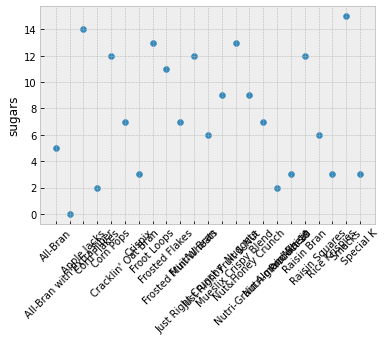

In [121]:
fig, ax = plt.subplots()

high_sugar= df_kelloggs['sugars']>=7

ax.scatter(df_kelloggs.index,df_kelloggs['sugars'])

ax.set_ylabel("sugars")
ax.set_xticklabels(df_kelloggs.index, rotation=45)

plt.show()

ValueError: x and y must be the same size

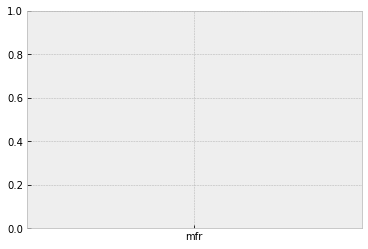

In [110]:
fig, ax = plt.subplots()

for product in df_kelloggs:
    cal_sugar = df_kelloggs[df_kelloggs["calories"] >=100]
    #print(cal_sugar)
    ax.scatter(product,cal_sugar["calories"])

ax.set_ylabel("calories")
ax.set_xticklabels(df_mfr, rotation=45)
ax.legend()
plt.show()


In [125]:
from datetime import date
d = date(2018, 10, 28)
d.year

2018

In [126]:
df.merge()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100% Bran,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
100% Natural Bran,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
All-Bran,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
All-Bran with Extra Fiber,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Almond Delight,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


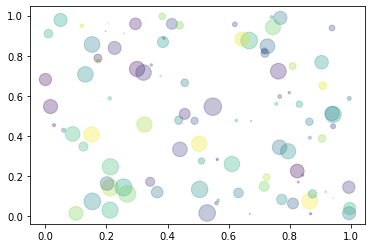

In [8]:
N = 100
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (10 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.3)
plt.show()